In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## NOTES
This notebook is for producing plots for estimation quality using Abylkairov Catalog and EOS classification for the Noiseless case. The Richers results can also be used test EOS classification using the Abylkairov catalog for training.

# Abylkairov Catalog

In [2]:
results_ab = pd.read_csv('PEABO3_nslsfilEOS_mer.csv')

In [6]:
# Drop Unnamed column with the index
results_ab = results_ab.drop('Unnamed: 0',axis=1)

In [82]:
# Column 'archivo' is corresponds to the .csv file generated from the run
results_ab.head()

,archivo,beta_est,beta_un,alpha_est,alpha_un,tau_est,tau_un,s_est,s_un,eos_name,T/|W|,fpeak,Deltah
0,nsls_signal_0,0.019010,0.000092,249.938845,2.636844,-0.000337,0.000001,0.000378,0.000001,SFHo,0.020376,782,158.227707
1,nsls_signal_1,0.024316,0.000109,225.758283,1.789571,-0.000367,0.000001,0.000373,0.000001,SFHo,0.026154,781,213.887430
2,nsls_signal_2,0.029106,0.000131,194.575652,1.476140,-0.000382,0.000001,0.000381,0.000001,SFHo,0.029104,780,241.394326
3,nsls_signal_3,0.031606,0.000137,181.180005,1.376963,-0.000390,0.000001,0.000375,0.000001,SFHo,0.032185,777,271.222293
4,nsls_signal_4,0.022520,0.000105,240.811730,1.961744,-0.000357,0.000001,0.000382,0.000001,SFHo,0.023256,780,183.536588


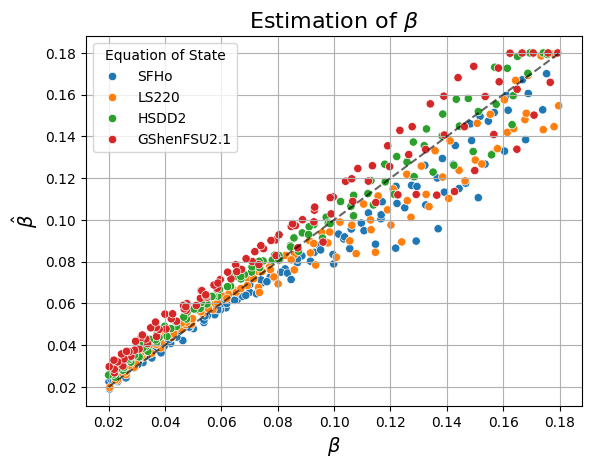

In [25]:
sns.scatterplot(data=results_ab,x='T/|W|',y='beta_est',hue='eos_name')
plt.plot([0.02, 0.18],[0.02,0.18],linestyle='--',color='black',alpha=0.6) # Line \hat{\beta} = \beta
plt.title(r'Estimation of $\beta$', fontsize=16)
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'$\hat{\beta}$', fontsize=14)
plt.legend(title='Equation of State')
plt.grid(True)

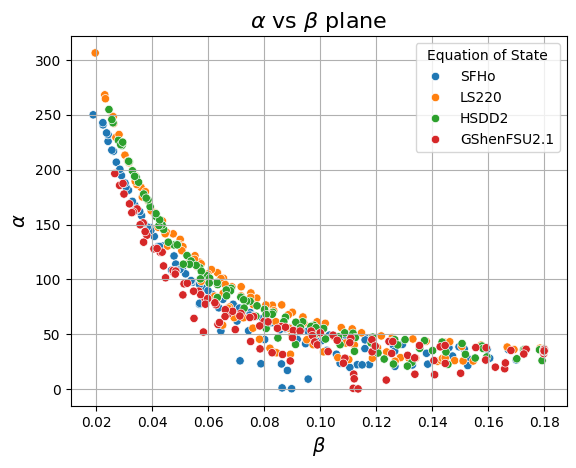

In [15]:
sns.scatterplot(data=results_ab,x='beta_est',y='alpha_est',hue='eos_name')
plt.title(r'$\alpha$ vs $\beta$ plane', fontsize=16)
plt.xlabel('$\\beta$', fontsize=14)
plt.ylabel('$\\alpha$', fontsize=14)
plt.legend(title='Equation of State')
plt.grid(True)

In [8]:
# Use the values for beta less than 0.08, for which there is not a lot of stochasticity
lowbetareg = results_ab[(results_ab['beta_est'] <= 0.08)]

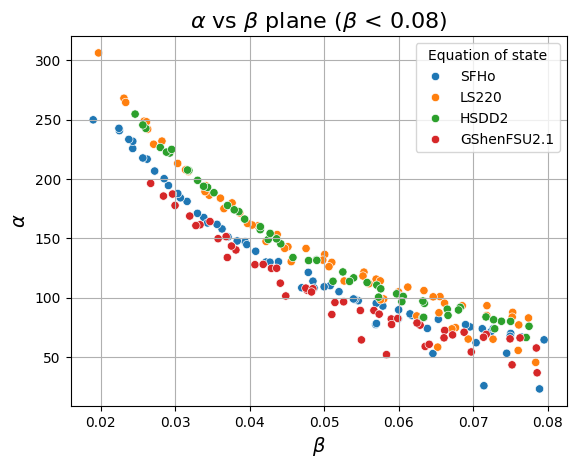

In [32]:
sns.scatterplot(data=lowbetareg,x='beta_est',y='alpha_est',hue='eos_name')
plt.title(r'$\alpha$ vs $\beta$ plane ($\beta$ < 0.08)', fontsize=16)
plt.xlabel('$\\beta$', fontsize=14)
plt.ylabel('$\\alpha$', fontsize=14)
plt.legend(title='Equation of state')
plt.grid(True)

#Richers Catalog

In [27]:
results = pd.read_csv('PE_RIC_nslsfil_merged_EOS.csv')

In [28]:
results.head()

,archivo,beta_est,beta_un,alpha_est,alpha_un,tau_est,tau_un,s_est,s_un,eos_name
0,RIC_nsls_signal_0,0.020986,0.000272,247.902787,6.646154,-0.000263,0.000003,0.000367,0.000003,SFHo
1,RIC_nsls_signal_1,0.022024,0.000202,250.552970,4.239099,-0.000259,0.000002,0.000378,0.000002,SFHx
2,RIC_nsls_signal_2,0.020063,0.000272,274.579024,6.812623,-0.000243,0.000004,0.000381,0.000004,LS220
3,RIC_nsls_signal_3,0.026769,0.000657,206.173153,9.198971,-0.000278,0.000007,0.000396,0.000003,BHBLP
4,RIC_nsls_signal_4,0.026650,0.000703,217.536731,10.083355,-0.000274,0.000008,0.000396,0.000004,HSDD2


In [29]:
# Exclude EOS that are not considered in the Abylkairov catalog
df_filtered = results[~results['eos_name'].isin(['SFHx', 'BHBLP'])].copy()

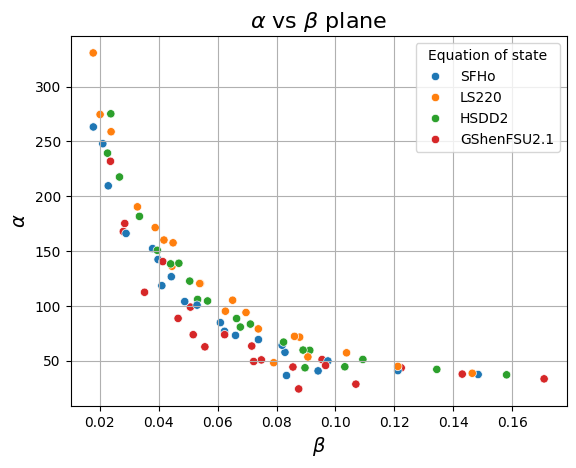

In [33]:
sns.scatterplot(data=df_filtered,x='beta_est',y='alpha_est',hue='eos_name')
plt.title(r'$\alpha$ vs $\beta$ plane', fontsize=16)
plt.xlabel('$\\beta$', fontsize = 14)
plt.ylabel('$\\alpha$', fontsize = 14)
plt.legend(title='Equation of state')
plt.grid(True)

# Classification of Equation of State using Abylkairov Catalog


## Fit a Power-Law using low beta regime for $\beta$

$$
\alpha (\beta) = A \beta^{B} + C
$$

In [35]:
# Choose 25% of the data for test
train_df, test_df = train_test_split(
    lowbetareg,
    test_size=0.25,
    random_state=42,
    shuffle=True
)


EOS: SFHo
a = 126.64691454349156
b = -0.3649882242115926
c = -268.02987164657486


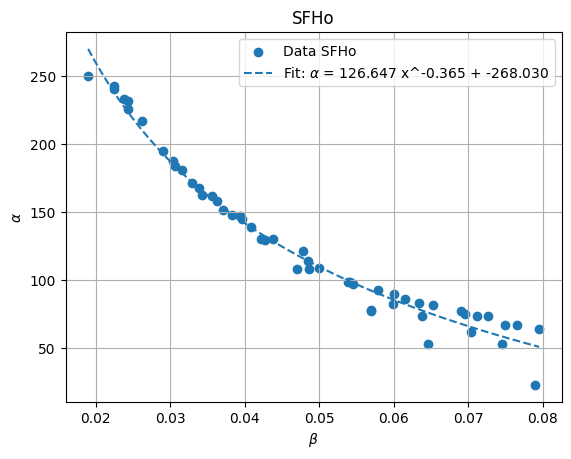


EOS: LS220
a = 40.00155430313795
b = -0.6019620080756024
c = -113.95615537059257


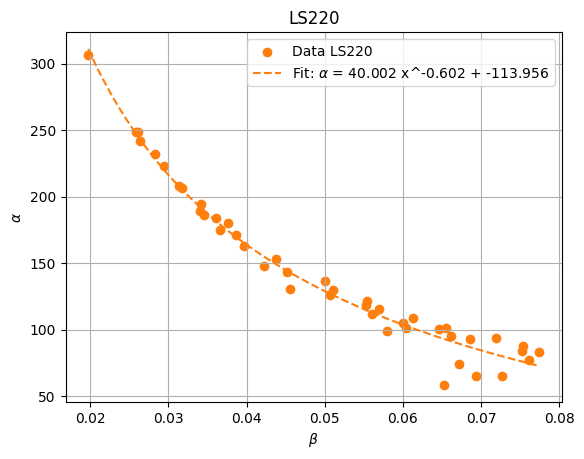


EOS: HSDD2
a = 36.48629348555222
b = -0.6233997754057549
c = -108.59305795132276


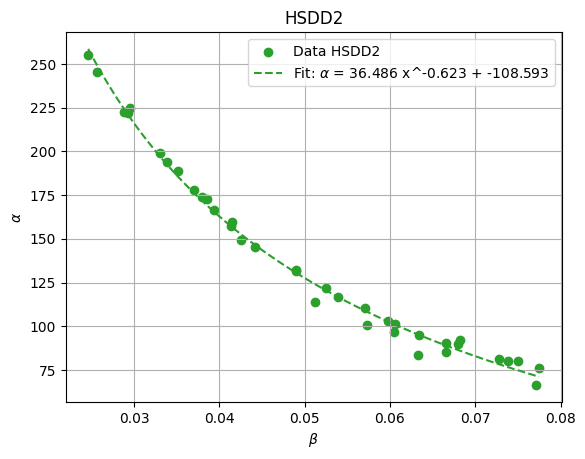


EOS: GShenFSU2.1
a = 18.431910494707676
b = -0.7473736120521285
c = -73.77034447604754


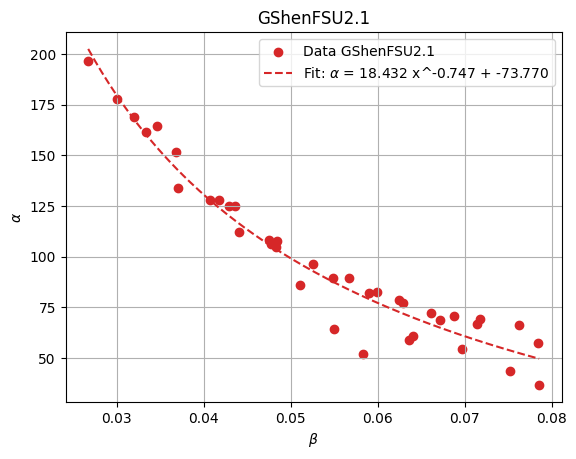

In [40]:
eqsofs = ['SFHo', 'LS220', 'HSDD2', 'GShenFSU2.1']

colors = {
    'SFHo': 'tab:blue',
    'LS220': 'tab:orange',
    'HSDD2': 'tab:green',
    'GShenFSU2.1': 'tab:red'
}

# define power law
def power_law(x, a, b, c):
    return a * x**b + c

# for saving parameters
fit_params = {}

for eos in eqsofs:
    df_eos = train_df[train_df['eos_name'] == eos]

    xdata = df_eos['beta_est'].values
    ydata = df_eos['alpha_est'].values

    popt, pcov = curve_fit(power_law, xdata, ydata)
    a, b, c = popt
    fit_params[eos] = popt

    print(f"\nEOS: {eos}")
    print(f"a = {a}")
    print(f"b = {b}")
    print(f"c = {c}")

    # Fitted curve
    x_fit = np.linspace(xdata.min(), xdata.max(), 200)
    y_fit = power_law(x_fit, a, b, c)


    plt.figure()
    plt.scatter(
        xdata, ydata,
        color=colors[eos],
        label=f"Data {eos}"
    )
    plt.plot(
        x_fit, y_fit,
        color=colors[eos],
        linestyle='--',
        label=fr"Fit: $\alpha$ = {a:.3f} x^{b:.3f} + {c:.3f}"
    )

    plt.title(eos)
    plt.xlabel(r"$\beta$")
    plt.ylabel(r"$\alpha$")
    plt.legend()
    plt.grid(True)
    plt.show()

In [45]:
fit_params['GShenFSU2.1'][2]

np.float64(-73.77034447604754)

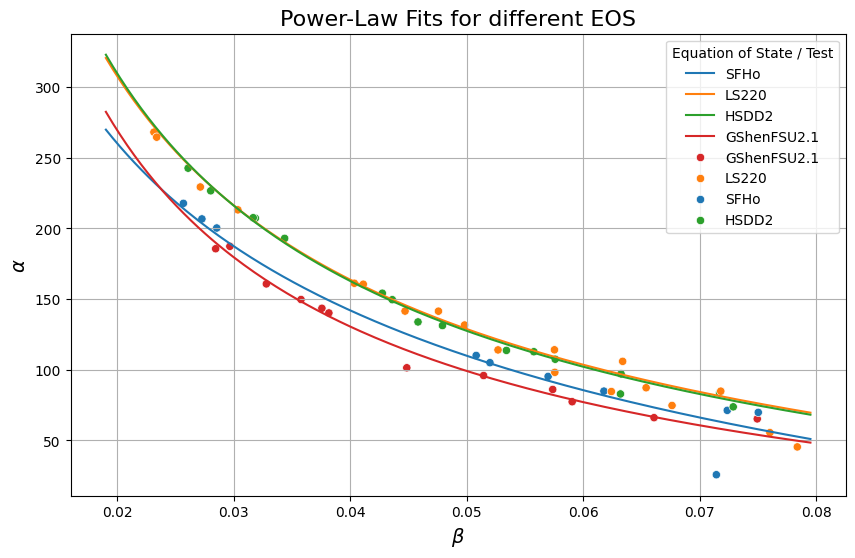

In [52]:
plt.figure(figsize=(10, 6))
beta_range = np.linspace(lowbetareg['beta_est'].min(), lowbetareg['beta_est'].max(), 200)

for k in eqsofs:
    a, b, c = fit_params[k]
    y_fit = power_law(beta_range, a, b, c)
    plt.plot(beta_range, y_fit, label=f'{k}', color=colors[k])

sns.scatterplot(data= test_df, x = 'beta_est', y = 'alpha_est', palette=colors, hue='eos_name')
plt.title(r'Power-Law Fits for different EOS',fontsize=16)
plt.xlabel(r'$\beta$',fontsize=14)
plt.ylabel(r'$\alpha$',fontsize=14)
plt.legend(title='Equation of State / Test')
plt.grid(True)
plt.show()

## Classification using residues
$\varepsilon = |\alpha_{\text{est}} - \alpha_{\text{fit}}(\beta)|$

In [55]:
def SFHo(beta):
  return fit_params['SFHo'][0]*(beta**(fit_params['SFHo'][1]))+fit_params['SFHo'][2]

In [57]:
def LS220(beta):
  return fit_params['LS220'][0]*(beta**(fit_params['LS220'][1]))+fit_params['LS220'][2]

In [56]:
def HSDD2(beta):
  return fit_params['HSDD2'][0]*(beta**(fit_params['HSDD2'][1]))+fit_params['HSDD2'][2]

In [62]:
def GShenFSU21(beta):
  return fit_params['GShenFSU2.1'][0]*(beta**(fit_params['GShenFSU2.1'][1]))+fit_params['GShenFSU2.1'][2]

In [66]:
def estimate_EOS(beta,alpha):
  #Calculate residues for each curve
  eps_sfho = np.abs(alpha - SFHo(beta))
  eps_ls220 = np.abs(alpha - LS220(beta))
  eps_hsdd2 = np.abs(alpha - HSDD2(beta))
  eps_gshenfsu21 = np.abs(alpha - GShenFSU21(beta))

  res = [eps_sfho,eps_ls220,eps_hsdd2,eps_gshenfsu21]

  return res.index(min(res))


In [67]:
signal_id = [x for x in test_df['archivo'].index]
len(signal_id)

57

In [68]:
y = []
x = []
for p in signal_id:
  pred_EOS = estimate_EOS(test_df['beta_est'][p],test_df['alpha_est'][p])
  y.append(pred_EOS)
  x.append(p)

In [69]:
df = pd.DataFrame({
    'signal_no': x,
    'pred_EOS_label': y
})

In [72]:
# Change the names of the EOS and add a column
eos_map = {
    0: 'SFHo',
    1: 'LS220',
    2: 'HSDD2',
    3: 'GShenFSU2.1'
}

df = df.copy()

df['pred_eos_name'] = df['pred_EOS_label'].map(eos_map)

display(df.head())

,signal_no,pred_EOS_label,pred_eos_name
0,436,3,GShenFSU2.1
1,120,1,LS220
2,9,0,SFHo
3,389,0,SFHo
4,15,2,HSDD2


In [74]:
mapping = {
    'SFHo': 0,
    'LS220': 1,
    'HSDD2': 2,
    'GShenFSU2.1': 3
}
eos_pred = df['pred_EOS_label']
eos_real = [mapping[y] for y in test_df['eos_name']]

In [76]:
accuracy = accuracy_score(eos_real,eos_pred)
accuracy

0.543859649122807

In [78]:
print(classification_report(eos_real,eos_pred))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.47      0.47      0.47        19
           2       0.42      0.31      0.36        16
           3       0.83      0.83      0.83        12

    accuracy                           0.54        57
   macro avg       0.56      0.58      0.56        57
weighted avg       0.54      0.54      0.54        57



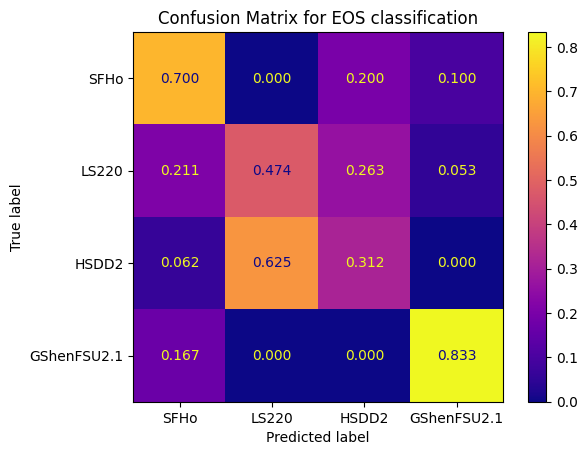

In [79]:
cm_norm = confusion_matrix(
    eos_real, eos_pred,
    normalize='true'
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_norm,
    display_labels=eqsofs
)

disp.plot(cmap='plasma', values_format='.3f')
plt.title("Confusion Matrix for EOS classification")
plt.show()


In [80]:
group_map = {
    0: 'GA',
    3: 'GA',
    1: 'GB',
    2: 'GB'
}

In [81]:
y_true_group = np.array([group_map[y] for y in eos_real])
y_pred_group = np.array([group_map[y] for y in eos_pred])

group_accuracy = (y_true_group == y_pred_group).mean()
print("Group accuracy:", group_accuracy)

Group accuracy: 0.8596491228070176
